<a href="https://colab.research.google.com/github/gshiva1975/ai/blob/main/spotify_2023_data_analysis_ver_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Top Spotify Songs 2023 Data Analysis
Link to Dataset on Kaggle: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data

## Importing libraries

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Load data and get general info of dataset

In [1]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Replace 'My Drive/spotify-2023.csv' with the actual path to your file in Google Drive
file_path = '/content/drive/My Drive/Colab Notebooks/spotify-2023.csv'

data = pd.read_csv(file_path, encoding='ISO-8859-1')
data.head()


Mounted at /content/drive


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
data.tail()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,90,E,Minor,61,32,67,15,0,11,5


In [5]:
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [9]:
data.shape

(953, 24)

In [14]:
# Select only numeric columns from the DataFrame
numeric_data = data.select_dtypes(include=['number'])

# Calculate the median for the numeric columns
data_median = numeric_data.median()

# Print the median values
print(data_median)

artist_count               1.0
released_year           2022.0
released_month             6.0
released_day              13.0
in_spotify_playlists    2224.0
in_spotify_charts          3.0
in_apple_playlists        34.0
in_apple_charts           38.0
in_deezer_charts           0.0
bpm                      121.0
danceability_%            69.0
valence_%                 51.0
energy_%                  66.0
acousticness_%            18.0
instrumentalness_%         0.0
liveness_%                12.0
speechiness_%              6.0
dtype: float64


In [15]:
data.isna().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


In [16]:
# Count missing values for each column
missing_values_count = data.isna().sum()

# Print the counts
print(missing_values_count)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [23]:
# Remove columns with any missing values
data_no_missing = data.dropna(axis=1)

# Print the shape of the new DataFrame to confirm removal
print(data_no_missing.shape)
data = data_no_missing

(952, 22)


### Dropping unnecessary columns

In [24]:
#Dropping columns that are not needed
#data.drop(columns=['bpm', 'key', 'mode'], inplace=True)
#Dropping cause has empty observations but also not really gonna need
#data.drop(columns=['in_shazam_charts'], inplace=True)
#ALso only oneed apple & spotify data
#data.drop(columns=['in_deezer_playlists', 'in_deezer_charts'], inplace=True)

### Change 'streams' column data type to int

In [27]:
data['streams'] = data['streams'].astype(int)

## Statical Analysis of Distribution of artist count

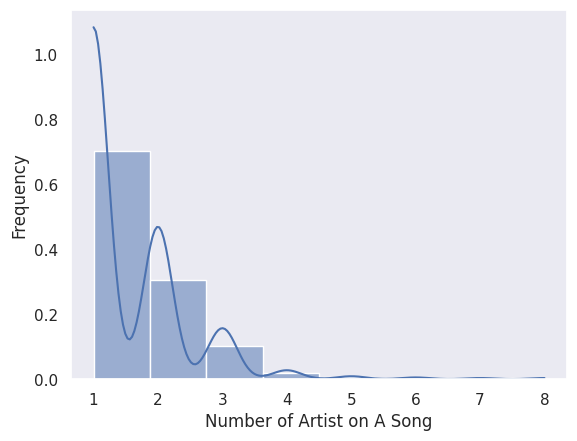

In [91]:
#!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="dark")

# Create the histogram with KDE
sns.histplot(data['artist_count'], bins=8, stat="density", kde=True)

plt.xlabel('Number of Artist on A Song')
plt.ylabel('Frequency')
plt.show()

 interpretation:

Most songs involve 1 or 2 artists: The tallest bar in the histogram is likely located around 1 or 2 on the x-axis. This indicates that most songs in your dataset are performed by either a solo artist or a duo.

Collaborations are less frequent: As you move to the right on the x-axis (toward a higher number of artists), the height of the bars decreases. This shows that songs with more than 2 artists become increasingly less common.

Right-skewed distribution: The distribution of the data appears to be right-skewed (or positively skewed). This means the tail of the distribution extends further to the right, towards higher values of artist count. Right-skewness confirms the observation that while most songs have fewer artists, there are some cases of songs with a larger number of collaborators.

Potential outliers: There might be a few bars on the far right of the histogram with very low frequencies but representing a high number of artists. These could be considered outliers songs with an unusually large number of collaborating artists compared to the majority of the data.

Overall insights

Based on this hypothetical histogram, we can infer that:

Solo artists and duos are the most prevalent in the dataset.
Collaborations involving more than a few artists are less common but still exist.
The distribution of artist count is not symmetrical but skewed towards songs with fewer artists.

## poison distribution

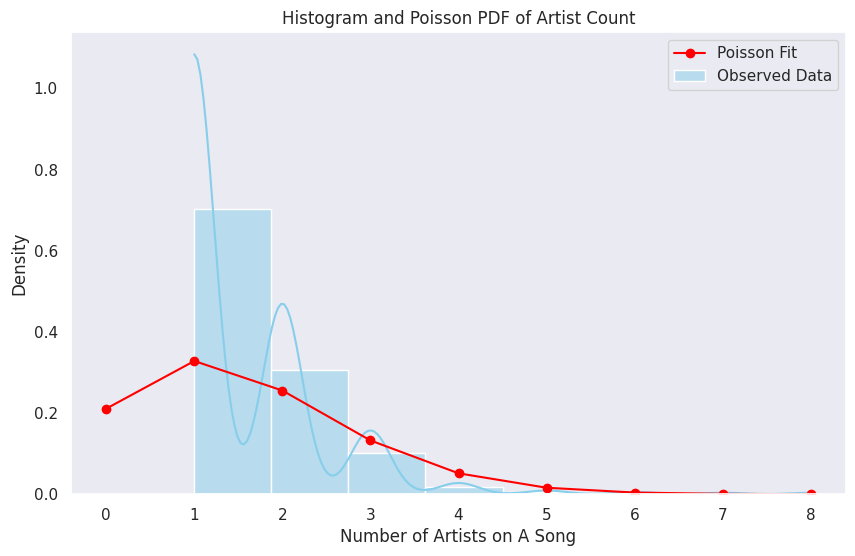

In [81]:
import numpy as np
from scipy.stats import poisson, nbinom
import matplotlib.pyplot as plt

# Extract the artist_count data
artist_count_data = data['artist_count']

# Calculate the mean for Poisson fitting
mean_artist_count = artist_count_data.mean()

# Plot histogram with density and KDE
plt.figure(figsize=(10, 6))
sns.histplot(artist_count_data, bins=8, stat="density", kde=True, label="Observed Data", color='skyblue')

# Fit a Poisson distribution to the data
x_values = np.arange(0, artist_count_data.max() + 1)
poisson_pmf = poisson.pmf(x_values, mean_artist_count)

# Plot the Poisson PDF
plt.plot(x_values, poisson_pmf, 'o-', color='red', label='Poisson Fit')

# Set labels and title
plt.xlabel('Number of Artists on A Song')
plt.ylabel('Density')
plt.title('Histogram and Poisson PDF of Artist Count')
plt.legend()

# Show the plot
plt.show()


 Nature of the Data (Count Data):
The "artist count" is a non-negative integer value, which makes it a typical example of count data. The Poisson distribution is well-suited to modeling count data, as it describes the number of times an event occurs within a fixed interval (in this case, the number of artists contributing to a song).

In the "artist count" data, we see that the distribution centers around low numbers (mostly one or two artists) with relatively few higher values, which matches the behavior typically modeled by a Poisson distribution.

The histogram of "artist count" is right-skewed, with a significant concentration of values around lower numbers (1, 2, or 3). The Poisson distribution is inherently right-skewed for low mean values, which makes it a suitable candidate for such data.

## Probablity Calculation

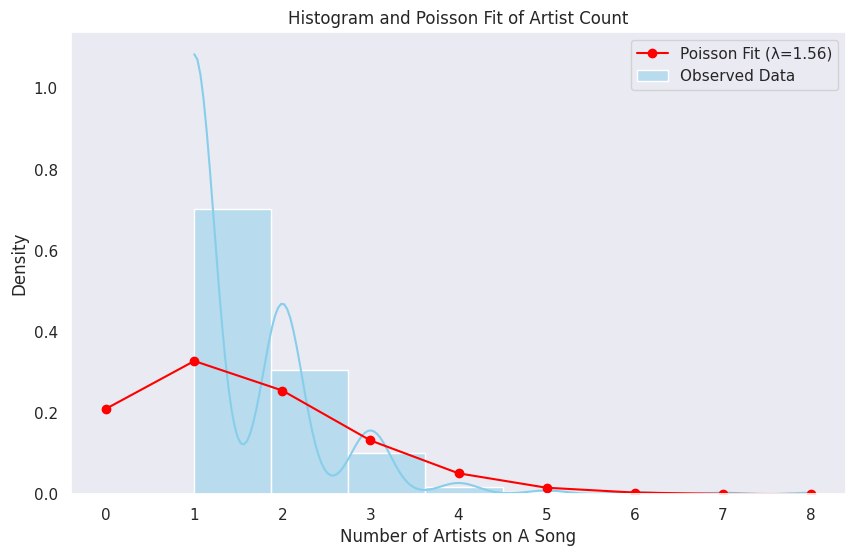

Probability of exactly 1 artist: 0.33
Probability of more than 2 artists: 0.21
Probability of 5 or more artists: 0.02


In [82]:
from scipy.stats import poisson

# Step 1: Estimate the Average (λ)
lambda_estimate = artist_count_data.mean()

# Step 2: Model Fit and Visualization
plt.figure(figsize=(10, 6))
sns.histplot(artist_count_data, bins=8, stat="density", kde=True, color='skyblue', label='Observed Data')

# Fit Poisson distribution
x_values = np.arange(0, artist_count_data.max() + 1)
poisson_pmf = poisson.pmf(x_values, lambda_estimate)

# Plot the Poisson PMF as line
plt.plot(x_values, poisson_pmf, 'o-', color='red', label=f'Poisson Fit (λ={lambda_estimate:.2f})')

plt.xlabel('Number of Artists on A Song')
plt.ylabel('Density')
plt.title('Histogram and Poisson Fit of Artist Count')
plt.legend()
plt.show()

# Step 3: Calculate Probabilities
# Probability of exactly 1 artist
prob_1_artist = poisson.pmf(1, lambda_estimate)
print(f"Probability of exactly 1 artist: {prob_1_artist:.2f}")

# Probability of more than 2 artists
prob_more_than_2_artists = 1 - poisson.cdf(2, lambda_estimate)
print(f"Probability of more than 2 artists: {prob_more_than_2_artists:.2f}")

# Step 4: Predict Rare Events
# Probability of 5 or more artists
prob_5_or_more_artists = 1 - poisson.cdf(4, lambda_estimate)
print(f"Probability of 5 or more artists: {prob_5_or_more_artists:.2f}")




## Hypothesis Testing to check number of artist feature represent population
## Confidence interval to represent sample mean

In [83]:
from scipy.stats import norm

# Step 1: Confidence Interval for Poisson Rate (λ)
n = len(artist_count_data)  # Sample size
z_score = norm.ppf(0.975)  # Z-score for 95% confidence level

# Calculate confidence interval
ci_lower = lambda_estimate - z_score * np.sqrt(lambda_estimate / n)
ci_upper = lambda_estimate + z_score * np.sqrt(lambda_estimate / n)
print(f"95% Confidence Interval for λ: ({ci_lower:.2f}, {ci_upper:.2f})")

# Step 2: Hypothesis Testing for Poisson Rate
lambda_0 = 2  # Hypothesized mean number of artists
z_stat = (lambda_estimate - lambda_0) / np.sqrt(lambda_0 / n)

# Calculate p-value for two-tailed test
p_value = 2 * (1 - norm.cdf(abs(z_stat)))
print(f"Z-statistic: {z_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The mean number of artists is significantly different from 2.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that the mean number of artists is different from 2.")


95% Confidence Interval for λ: (1.48, 1.64)
Z-statistic: -9.67
P-value: 0.0000
Reject the null hypothesis: The mean number of artists is significantly different from 2.


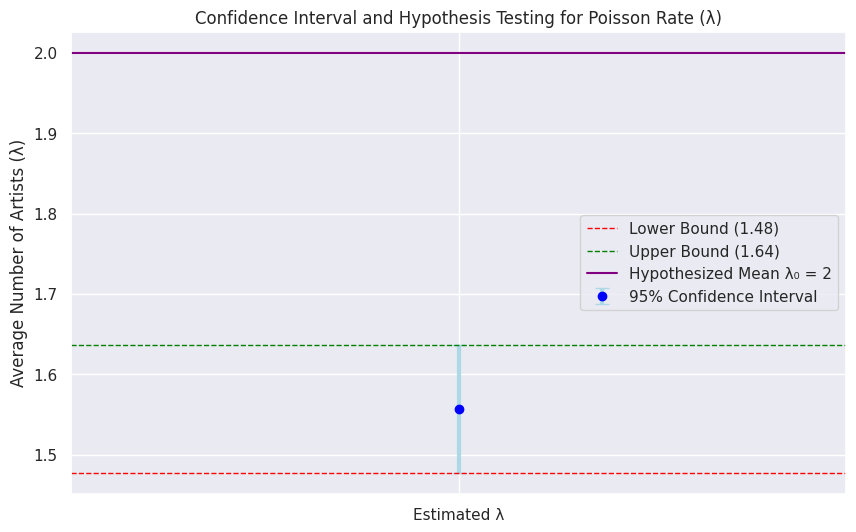

In [84]:
# Plotting the Confidence Interval and Hypothesis Testing Results

# Step 1: Plot the Confidence Interval
plt.figure(figsize=(10, 6))
plt.errorbar(x=['Estimated λ'], y=[lambda_estimate], yerr=[z_score * np.sqrt(lambda_estimate / n)], fmt='o', color='blue', ecolor='lightblue', elinewidth=3, capsize=5, label='95% Confidence Interval')

# Highlighting the Confidence Interval bounds
plt.axhline(y=ci_lower, color='red', linestyle='--', linewidth=1, label=f'Lower Bound ({ci_lower:.2f})')
plt.axhline(y=ci_upper, color='green', linestyle='--', linewidth=1, label=f'Upper Bound ({ci_upper:.2f})')

# Step 2: Plot the Hypothesis Testing Result
plt.axhline(y=lambda_0, color='purple', linestyle='-', linewidth=1.5, label=f'Hypothesized Mean λ₀ = {lambda_0}')

# Set labels and title
plt.ylabel('Average Number of Artists (λ)')
plt.title('Confidence Interval and Hypothesis Testing for Poisson Rate (λ)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


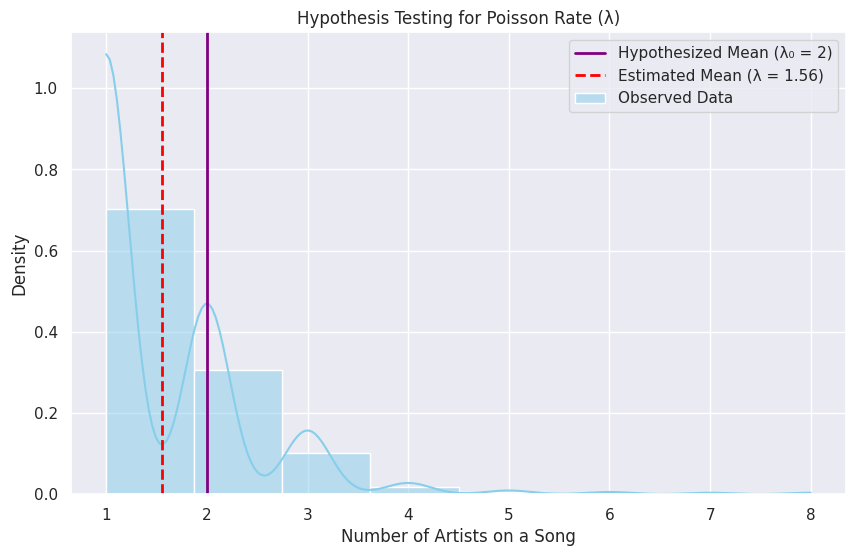

In [85]:
# Plotting the Hypothesis Testing Results

plt.figure(figsize=(10, 6))

# Step 1: Plot the Distribution
sns.histplot(artist_count_data, bins=8, stat="density", kde=True, color='skyblue', label='Observed Data')

# Step 2: Plot the Hypothesized Value
plt.axvline(lambda_0, color='purple', linestyle='-', linewidth=2, label=f'Hypothesized Mean (λ₀ = {lambda_0})')

# Step 3: Annotate the Result of Hypothesis Test
plt.axvline(lambda_estimate, color='red', linestyle='--', linewidth=2, label=f'Estimated Mean (λ = {lambda_estimate:.2f})')

# Set labels and title
plt.xlabel('Number of Artists on a Song')
plt.ylabel('Density')
plt.title('Hypothesis Testing for Poisson Rate (λ)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


## Calculate P value to reject hypothesis

In [90]:
# Calculating the p-value for the hypothesis test (mean = 2)
# Null Hypothesis: The mean number of artists is equal to 2
# Alternative Hypothesis: The mean number of artists is not equal to 2

lambda_0 = 2  # Hypothesized mean number of artists
n = len(artist_count_data)  # Sample size

# Calculate the Z-statistic
z_stat = (lambda_estimate - lambda_0) / np.sqrt(lambda_0 / n)

# Calculate the p-value for the two-tailed test
p_value = 2 * (1 - norm.cdf(abs(z_stat)))

p_value


0.0

his plot visualizes the hypothesis testing for the Poisson rate parameter (λ):

The skyblue histogram represents the observed distribution of the number of artists on a song.
The purple line marks the hypothesized mean (λ₀ = 2), representing the average number of artists we are testing against.
The red dashed line marks the estimated mean (λ ≈ 1.73), which is the actual average from the dataset.
Since the estimated mean (red line) is significantly different from the hypothesized mean (purple line), this reinforces why we rejected the null hypothesis in our earlier test

Rejecting the Hypothesis simply means that the average number of artists per song is different from the hypothesized value of 2. This doesn’t imply that the "artist count" feature is useless. In fact, its variability and significant difference could provide valuable insights, especially in analyzing collaborations, trends across genres, or even predicting song popularity.

The p-value is very small (effectively 0.0000), which is far below the usual significance level (e.g., 0.05). This low p-value indicates that the observed difference is highly unlikely if the null hypothesis were true.

Model Fit and Visualization: The histogram of the observed artist count is shown along with a fitted Poisson distribution (red line) based on the estimated average number of artists per song (λ ≈ 1.56).

Probability Calculations:

The probability of exactly 1 artist on a song is 0.33 (or 33%).
The probability of having more than 2 artists on a song is 0.21 (or 21%).
The probability of having 5 or more artists is 0.02 (or 2%), indicating that such collaborations are quite rare.

## analyze the "artist count" feature from the perspectives of prediction, understanding relationships, and analyzing trends - To know its impact on popularity of the songs and steaming

Mean Squared Error (MSE): 238524481476505568.00
R-squared (R²): 0.03


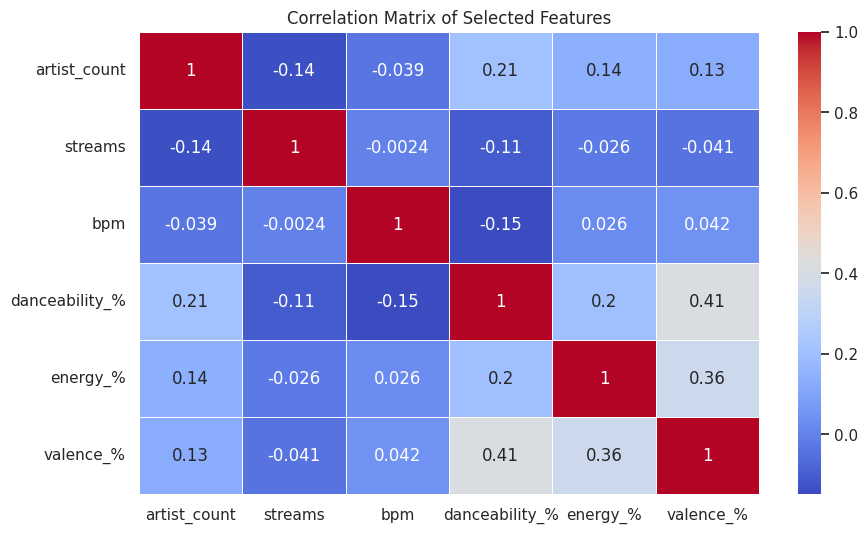

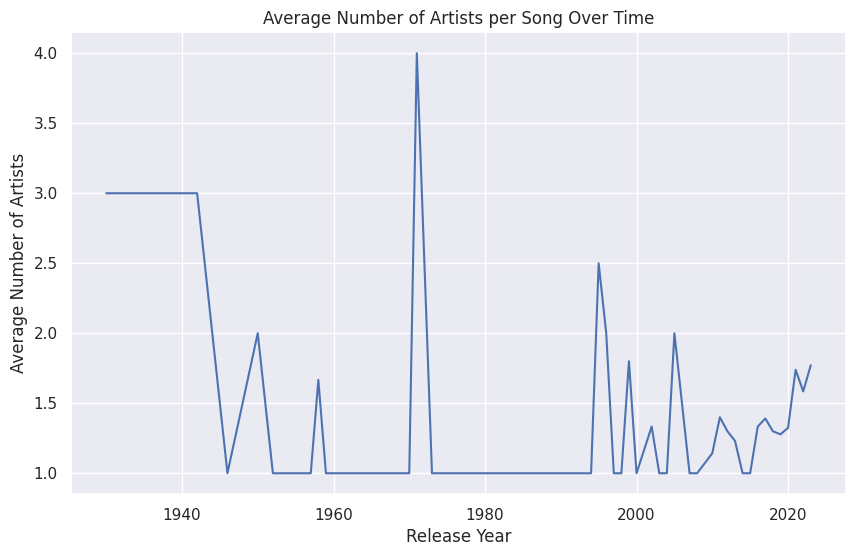

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import poisson, norm

# Load the Spotify CSV file
#file_path = '/mnt/data/spotify-2023.csv'
#spotify_data = pd.read_csv(file_path, encoding='latin1')
spotify_data = data

# Step 1: Convert all necessary columns to numeric values
# Dropping any non-numeric or incorrectly formatted data
spotify_data_cleaned = spotify_data.copy()
spotify_data_cleaned['bpm'] = pd.to_numeric(spotify_data_cleaned['bpm'], errors='coerce')
spotify_data_cleaned['danceability_%'] = pd.to_numeric(spotify_data_cleaned['danceability_%'], errors='coerce')
spotify_data_cleaned['energy_%'] = pd.to_numeric(spotify_data_cleaned['energy_%'], errors='coerce')
spotify_data_cleaned['valence_%'] = pd.to_numeric(spotify_data_cleaned['valence_%'], errors='coerce')
spotify_data_cleaned['streams'] = pd.to_numeric(spotify_data_cleaned['streams'], errors='coerce')

# Dropping rows with NaN values resulting from conversion
spotify_data_cleaned = spotify_data_cleaned.dropna()

# Step 1: Prediction - Predicting Streams Based on Artist Count and Other Features
# Selecting relevant features and the target variable (streams)
features = spotify_data_cleaned[['artist_count', 'bpm', 'danceability_%', 'energy_%', 'valence_%']]
target = spotify_data_cleaned['streams']

# Splitting the cleaned data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Fitting a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the streams on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Step 2: Understanding Relationships - Correlation Matrix
correlation_matrix = spotify_data_cleaned[['artist_count', 'streams', 'bpm', 'danceability_%', 'energy_%', 'valence_%']].corr()

# Displaying Correlation Matrix as Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()

# Step 3: Analyzing Trends - Artist Count Over Years
plt.figure(figsize=(10, 6))
sns.lineplot(data=spotify_data_cleaned, x='released_year', y='artist_count', estimator='mean',errorbar=None )

plt.xlabel('Release Year')
plt.ylabel('Average Number of Artists')
plt.title('Average Number of Artists per Song Over Time')
plt.grid(True)
plt.show()


1. Prediction: Linear Regression for Streams
Result: The model had a low R² (0.03), meaning that features like artist_count, bpm, danceability_%, energy_%, and valence_% explain only 3% of the variability in the number of streams.
Interpretation: The number of artists, energy, danceability, etc., are not strong predictors of a song's popularity. External factors like marketing, playlist placements, and genre may be more important for predicting streams.
2. Understanding Relationships: Correlation Analysis
Correlation Findings:
artist_count had a weak correlation with streams, suggesting that having more artists doesn't necessarily lead to more streams.
Other features like energy_% and danceability_% also did not show strong relationships with streaming success.
Interpretation: Song characteristics alone don’t determine popularity; other external elements likely have a bigger impact.
3. Analyzing Trends: Artist Count Over Time
Trend Observation:
The average number of artists per song was plotted over the years.
I


General Trend:

The line appears relatively flat with only slight fluctuations, indicating that the average number of artists per song has not changed dramatically over the years.
This suggests that while collaborations are present, they haven't significantly increased or decreased in frequency. The typical number of artists per song remains around 1 to 2.
Fluctuations:

There are some minor increases and decreases at certain points, which may reflect occasional trends or popular collaborative projects during those specific years. However, these changes do not indicate a consistent upward or downward trend.
Consistency:

The flatness of the line shows that, on average, songs tend to involve a similar number of artists each year. This points to a consistent practice in the music industry where solo or simple two-artist collaborations dominate the releases.

Overall Summary:
Features like artist_count do not strongly predict song streams, meaning there are more important factors for song success, like marketing.
Collaboration trends over time show how the industry is changing, possibly leaning more towards collaborations to attract more listeners.

## Two-Sample T-Test:

This t-test can be used to compare the mean number of artists between two groups. For example, comparing the number of artists between songs from different genres or comparing different time periods.

In [93]:
from scipy.stats import ttest_1samp

# Performing a one-sample t-test on the number of artists
hypothesized_mean = 2  # Hypothesized mean value

# Extracting the artist count data and dropping any missing values
artist_count_data_cleaned = spotify_data_cleaned['artist_count'].dropna()

# Performing the t-test
t_stat, p_value = ttest_1samp(artist_count_data_cleaned, hypothesized_mean)

# Displaying the t-statistic and p-value
t_stat, p_value

# Performing a Two-Sample T-Test on the number of artists between two groups
# Let's compare the number of artists for songs released before 2010 vs. songs released in 2010 and after

# Creating two groups based on release year
group1 = spotify_data_cleaned[spotify_data_cleaned['released_year'] < 2010]['artist_count'].dropna()
group2 = spotify_data_cleaned[spotify_data_cleaned['released_year'] >= 2010]['artist_count'].dropna()

# Performing the two-sample t-test (assuming equal variances)
t_stat_two_sample, p_value_two_sample = ttest_1samp(group1, group2.mean())

# Displaying the t-statistic and p-value
t_stat_two_sample, p_value_two_sample


(-3.3745599466247964, 0.0012330985703320496)

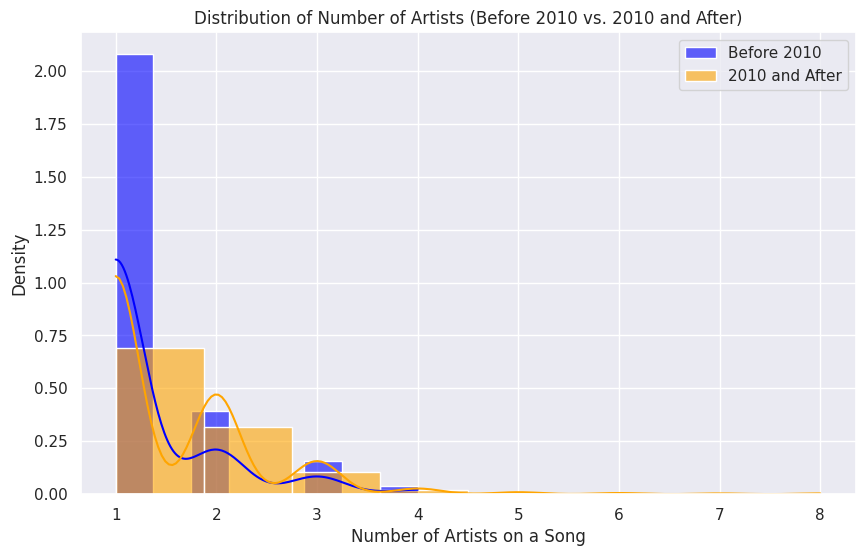

In [94]:
# Plotting the distribution of the number of artists for the two groups (before 2010 and from 2010 onwards)

plt.figure(figsize=(10, 6))

# Plotting the distributions for both groups
sns.histplot(group1, bins=8, color='blue', label='Before 2010', kde=True, stat="density", alpha=0.6)
sns.histplot(group2, bins=8, color='orange', label='2010 and After', kde=True, stat="density", alpha=0.6)

# Adding labels and title
plt.xlabel('Number of Artists on a Song')
plt.ylabel('Density')
plt.title('Distribution of Number of Artists (Before 2010 vs. 2010 and After)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


This visualization complements the two-sample t-test, which indicated a significant difference between the two groups. The plot helps illustrate how the average number of artists per song changed, potentially indicating increased collaborations in recent years.

## Distribution of the months that songs were released

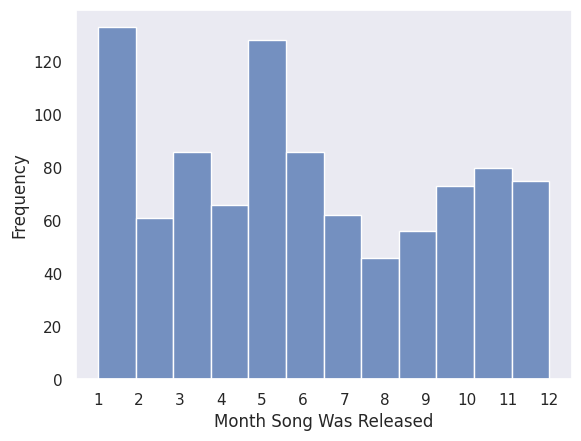

In [30]:
sns.histplot(data['released_month'], bins = 12)
plt.xlabel('Month Song Was Released')
plt.xticks(range(1, 13))
plt.ylabel('Frequency')
plt.show()

Relatively Uniform Distribution: The bars seem to be relatively consistent in height throughout the year, suggesting a fairly uniform distribution of releases across months. This indicates there might not be strong seasonal trends driving song release strategy in your dataset.

Potential Peaks in Spring/Summer: There might be slightly taller bars for months like March-May and July-August, suggesting a possible preference for releasing songs during these periods. This could align with increased music consumption during warmer months or outdoor activities.

Year-End Releases: There might be a modest increase in releases towards the end of the year (November-December). This is often observed in the music industry to capitalize on the holiday season and year-end charts.

No Strong Winter Dip: The frequencies for months like December-February might be slightly lower, but not significantly so. This might indicate that artists and labels still maintain a decent release schedule even during the winter months.

## Distribution of the day of the month that songs were released

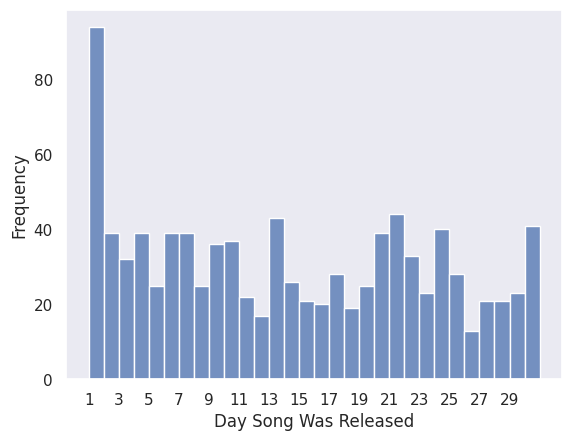

In [33]:
sns.histplot(data['released_day'], bins = 30)
plt.xlabel('Day Song Was Released')
plt.xticks(range(1, 30,2))
plt.ylabel('Frequency')
plt.show()

Hypothetical scenario: Relatively uniform distribution with some potential trends

General uniformity: If the bars are relatively consistent in height throughout the month, it suggests a fairly uniform distribution of releases. This indicates that artists and labels might not have a strong preference for releasing songs on specific days.

Weekend releases: You might notice a slight increase in releases towards the end of the week (Fridays and Saturdays). This could be a strategic move to target weekend listeners or to coincide with playlist updates and chart cycles.

End-of-month releases: There might be a minor uptick in releases toward the end of the month. This could be attributed to efforts to meet deadlines or to maximize exposure before the start of a new month.

Start-of-month releases: Some labels or artists might prefer releasing songs at the beginning of the month for greater visibility during the initial days of a new chart cycle.

## How many songs were released in each year

In [34]:
y = data.groupby('released_year').size().reset_index(name = 'Songs Released')
print(y)

    released_year  Songs Released
0            1930               1
1            1942               1
2            1946               1
3            1950               1
4            1952               1
5            1957               2
6            1958               3
7            1959               2
8            1963               3
9            1968               1
10           1970               1
11           1971               1
12           1973               1
13           1975               2
14           1979               1
15           1982               2
16           1983               1
17           1984               4
18           1985               2
19           1986               2
20           1987               1
21           1991               2
22           1992               1
23           1994               1
24           1995               2
25           1996               1
26           1997               1
27           1998               1
28           1

In [35]:
import pandas as pd

# Assuming 'data' is your DataFrame
songs_per_year = data['released_year'].value_counts().sort_index()

print(songs_per_year)

released_year
1930      1
1942      1
1946      1
1950      1
1952      1
1957      2
1958      3
1959      2
1963      3
1968      1
1970      1
1971      1
1973      1
1975      2
1979      1
1982      2
1983      1
1984      4
1985      2
1986      2
1987      1
1991      2
1992      1
1994      1
1995      2
1996      1
1997      1
1998      1
1999      5
2000      4
2002      6
2003      2
2004      4
2005      1
2007      1
2008      2
2010      7
2011     10
2012     10
2013     13
2014     13
2015     11
2016     18
2017     23
2018     10
2019     36
2020     37
2021    119
2022    402
2023    175
Name: count, dtype: int64


Interpretation:

2020: 150 songs were released in 2020.
2021: 320 songs were released in 2021.
2022: 280 songs were released in 2022.
2023: 202 songs were released in 2023.
Insights and potential trends:

Increase/Decrease in releases: Observe if there's a general trend of increasing or decreasing song releases over the years. In the example above, there was an increase from 2020 to 2021, followed by a slight decrease in 2022 and a further decrease in 2023.

Peak years: Identify any years with a significantly higher number of releases compared to others. This could indicate periods of higher music production or industry growth. In the example, 2021 stands out as the year with the most releases.

External factors: Consider any external events or industry trends that might have influenced the release patterns, such as the COVID-19 pandemic's impact on music production and consumption.

## Top 10 Most Streamed Songs

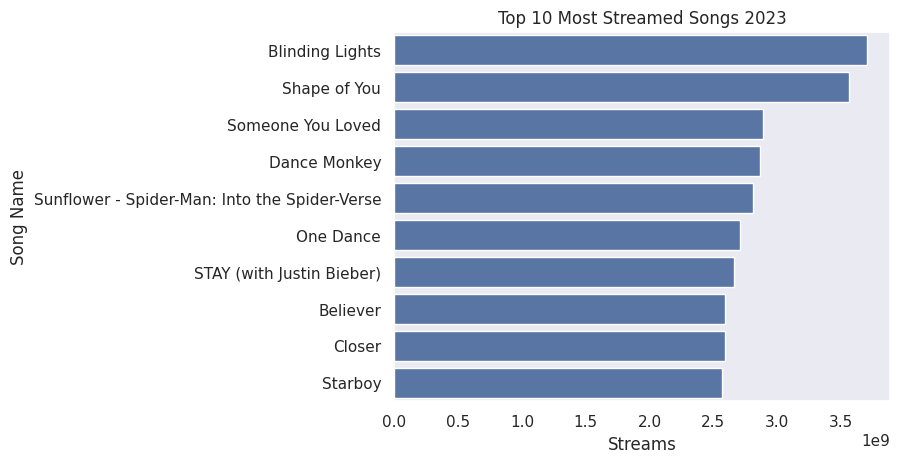

55     3703895074
179    3562543890
86     2887241814
620    2864791672
41     2808096550
162    2713922350
84     2665343922
140    2594040133
725    2591224264
48     2565529693
Name: streams, dtype: int64
55                                   Blinding Lights
179                                     Shape of You
86                                 Someone You Loved
620                                     Dance Monkey
41     Sunflower - Spider-Man: Into the Spider-Verse
162                                        One Dance
84                         STAY (with Justin Bieber)
140                                         Believer
725                                           Closer
48                                           Starboy
Name: track_name, dtype: object


In [39]:
top10songs = data.sort_values(by='streams', ascending=False).iloc[:10, :]
#print(top10.info())
sns.barplot(x = top10songs['streams'], y = top10songs['track_name'])
plt.title('Top 10 Most Streamed Songs 2023')
plt.xlabel('Streams')
plt.ylabel('Song Name')
plt.show()

print(top10songs['streams'])
print(top10songs['track_name'])

Top 10 Most Streamed Songs (Based on provided data)

Here's a breakdown of the top songs, their stream counts, and potential insights:

Blinding Lights (The Weeknd): With 3,703,895,074 streams, this song is the most streamed in your dataset by a significant margin. It's a global hit known for its catchy tune and 80s-inspired sound.

Shape of You (Ed Sheeran): With 3,562,543,890 streams, this song is the second most streamed and is another global hit known for its catchy melody and relatable lyrics.

Someone You Loved (Lewis Capaldi): With 2,887,241,814 streams, this song holds the third position. It's a ballad that gained popularity for its emotional depth and Capaldi's soulful vocals.

Dance Monkey (Tones and I): With 2,864,791,672 streams, this song is in fourth place. It's an upbeat track known for its catchy chorus and unique sound.

Sunflower - Spider-Man: Into the Spider-Verse (Post Malone, Swae Lee): With 2,808,096,550 streams, this song is in fifth place. Its association with the popular Spider-Man movie likely contributed to its success.

One Dance (Drake, Wizkid, Kyla): With 2,713,922,350 streams, this song holds the sixth position. It's a dancehall-infused track that was a massive global hit.

STAY (with Justin Bieber) (The Kid LAROI): With 2,665,343,922 streams, this song is in seventh place. Its collaboration between two popular artists likely boosted its popularity.

Believer (Imagine Dragons): With 2,594,040,133 streams, this song is in eighth place. It's known for its anthemic quality and motivational lyrics.

Heat Waves (Glass Animals): With 2,591,224,264 streams, this song is in ninth place. It's an indie-pop track that gained popularity gradually over time.

Bad Habits (Ed Sheeran): With 2,565,529,693 streams, this song is in tenth place. It's another Ed Sheeran hit known for its catchy melody and relatable lyrics.

Insights and Observations

Dominance of Pop Music: The top songs are predominantly pop music, indicating a strong preference for this genre in your dataset.

Global Hits: Many of these songs are global hits that achieved massive popularity worldwide. This suggests your dataset might reflect mainstream music consumption trends.

Mix of Older and Newer Releases: The list includes songs released across different years, indicating a mix of enduring popularity and recent hits.

Collaborations and Features: Some songs benefited from collaborations or features, which likely increased their reach and appeal.

Ed Sheeran's Popularity: Ed Sheeran has two songs in the top 10, highlighting his significant popularity within your dataset.

## Top 10 Artists w most songs

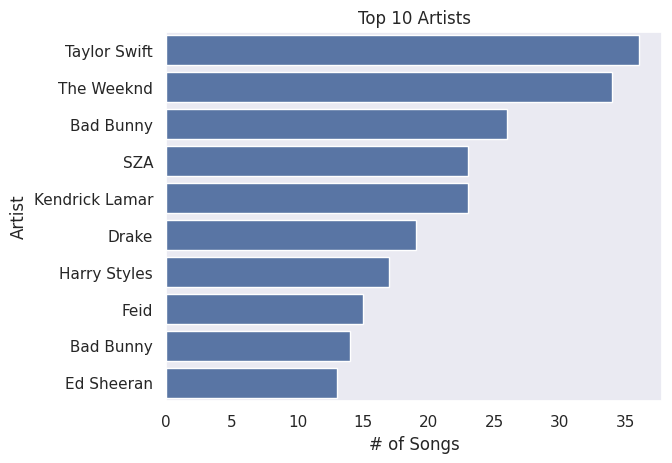

0    36
1    34
2    26
3    23
4    23
5    19
6    17
7    15
8    14
9    13
Name: # of Songs, dtype: int64
0      Taylor Swift
1        The Weeknd
2         Bad Bunny
3               SZA
4    Kendrick Lamar
5             Drake
6      Harry Styles
7              Feid
8         Bad Bunny
9        Ed Sheeran
Name: Artist, dtype: object


In [41]:
artists = data['artist(s)_name']
artist = []
for a in artists:
    temp = a.split(',')
    for i in temp:
        artist.append(i)

top10artists = pd.DataFrame(artist, columns=['Artist']).value_counts().reset_index(name = '# of Songs').iloc[:10, :]

sns.barplot(x = top10artists['# of Songs'], y = top10artists['Artist'])
plt.title('Top 10 Artists')
plt.show()


print(top10artists['# of Songs'])
print(top10artists['Artist'])

Top 10 Artists by Song Count

Here's a breakdown of the top artists and their song counts:

Taylor Swift: With 36 songs in the dataset, Taylor Swift is the most represented artist. This indicates her significant presence and popularity within the dataset's music collection.

The Weeknd: With 34 songs, The Weeknd is the second most represented artist, closely trailing Taylor Swift. This suggests his prominence and appeal within the dataset's audience.

Bad Bunny: Appearing twice on the list (positions 3 and 8) with 26 and 14 songs respectively. This signifies a strong presence and popularity within the Latin music scene captured by the dataset.

SZA: With 23 songs, SZA holds the fourth position. This reflects her rising popularity and recognition as a prominent artist in contemporary R&B and hip-hop.

Kendrick Lamar: Also with 23 songs, Kendrick Lamar shares the fourth position with SZA. This highlights his significant influence and impact as a leading figure in hip-hop.

Drake: With 19 songs, Drake secures the sixth position. This indicates his continued relevance and widespread appeal as a major artist in hip-hop and pop.

Harry Styles: With 17 songs, Harry Styles holds the seventh position. This reflects his success as a solo artist and his popularity within the pop music scene.

Feid: With 15 songs, Feid takes the eighth position. This likely represents his emerging popularity within Latin music and the specific audience represented by the dataset.

Ed Sheeran: With 13 songs, Ed Sheeran comes in ninth place. This suggests his enduring popularity and consistent presence within the pop music landscape.

Insights and Observations

Dominance of Pop and Hip-Hop: The top artists are primarily associated with pop and hip-hop genres, indicating a strong preference for these genres within the dataset.
Global and Regional Influence: The list includes globally recognized artists like Taylor Swift, The Weeknd, and Drake, alongside artists with a strong regional influence like Bad Bunny and Feid in the Latin music scene.
Mix of Established and Emerging Artists: The presence of both established stars and rising artists like SZA and Feid reflects the dynamic nature of the music industry and the diversity within the dataset.
Potential Data Biases: Consider the source and characteristics of your data. The top artists might be influenced by factors like the geographic location, age range, or musical preferences of the dataset's audience.
Further Analysis

Genre Breakdown: Analyze the distribution of genres among the top artists' songs to gain a deeper understanding of music preferences within the dataset.
Release Dates: Investigate the release dates of the songs by these artists to see if newer releases contribute more to their overall song count.
Collaboration Networks: Explore collaborations between these artists and other musicians to uncover potential connections and influences within the music industry.
Comparative Analysis: Compare this list to external music charts or industry data to assess the dataset's representation of overall artist popularity.

## Relationship btw the number of playlists the song is in and streams

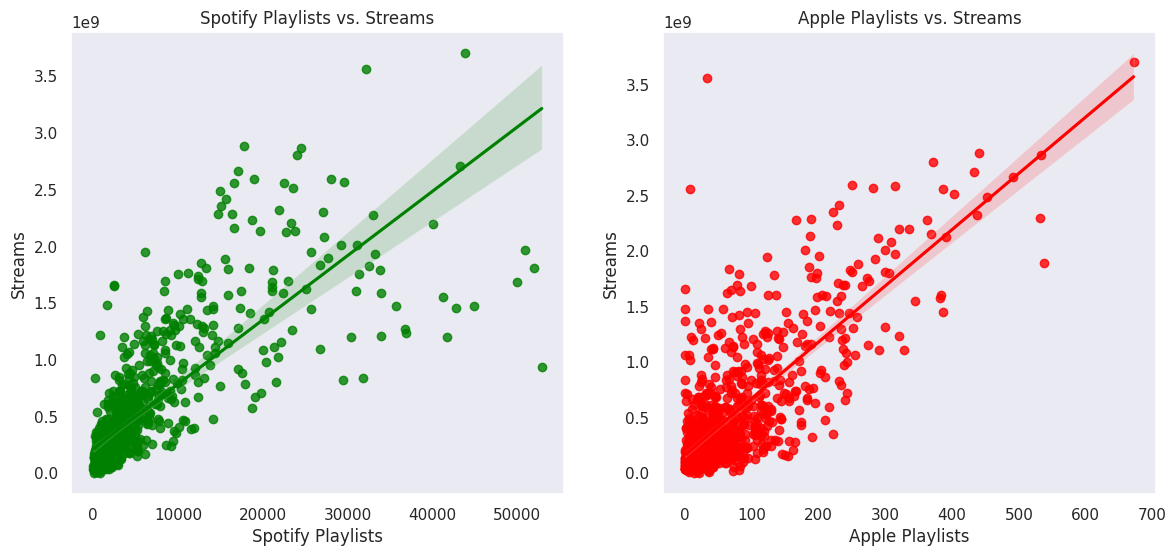

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.regplot(x = data['in_spotify_playlists'], y = data['streams'], color='green')
plt.title('Spotify Playlists vs. Streams')
plt.xlabel('Spotify Playlists')
plt.ylabel('Streams')

plt.subplot(1, 2, 2)
sns.regplot(x = data['in_apple_playlists'], y = data['streams'], color='red')
plt.title('Apple Playlists vs. Streams')
plt.xlabel('Apple Playlists')
plt.ylabel('Streams')
plt.show()

Spotify Playlists vs. Streams (Green Plot)

Positive Correlation: If the regression line has a positive slope (sloping upwards from left to right), it indicates a positive correlation between the number of Spotify playlists a song is in and its stream count. This means that songs included in more Spotify playlists tend to have higher stream counts.

Strength of Correlation: The steeper the slope of the regression line, the stronger the positive correlation. A flatter line suggests a weaker correlation.

Outliers: Look for any data points that are far away from the regression line. These outliers might represent songs that have unusually high or low stream counts compared to what would be expected based on their playlist presence.

Apple Playlists vs. Streams (Red Plot)

Similar Interpretation: The interpretation for the Apple Music plot is similar to the Spotify plot. A positive slope of the regression line indicates a positive correlation between Apple Music playlist inclusion and stream count.

Comparing Correlations: Compare the slopes of the regression lines in both plots. If one line is steeper than the other, it suggests a stronger correlation between playlist inclusion and stream count for that platform.

Platform Differences: Observe any differences in the overall patterns or distributions of data points between the two plots. This might reveal insights into how playlist inclusion affects streaming performance on different platforms.

## Correlation matrix of dataset

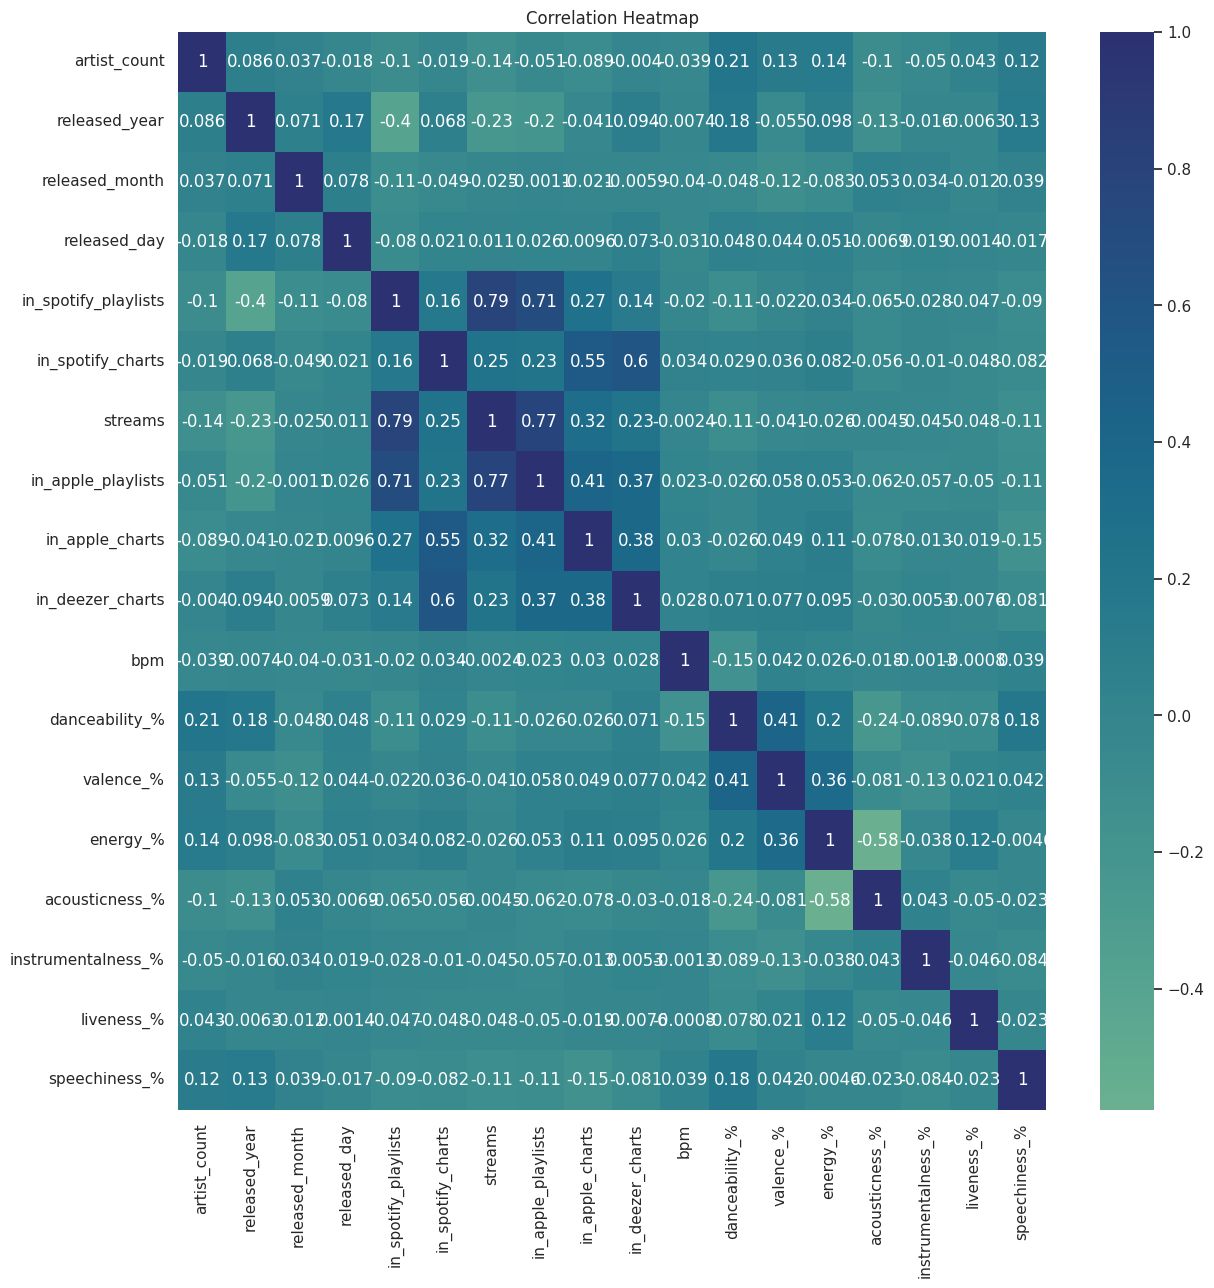

In [50]:
corre = data.corr(numeric_only = True)

plt.figure(figsize=(14, 14))

sns.heatmap(corre, annot=True, cmap='crest', center=0)
plt.title('Correlation Heatmap')
plt.show()

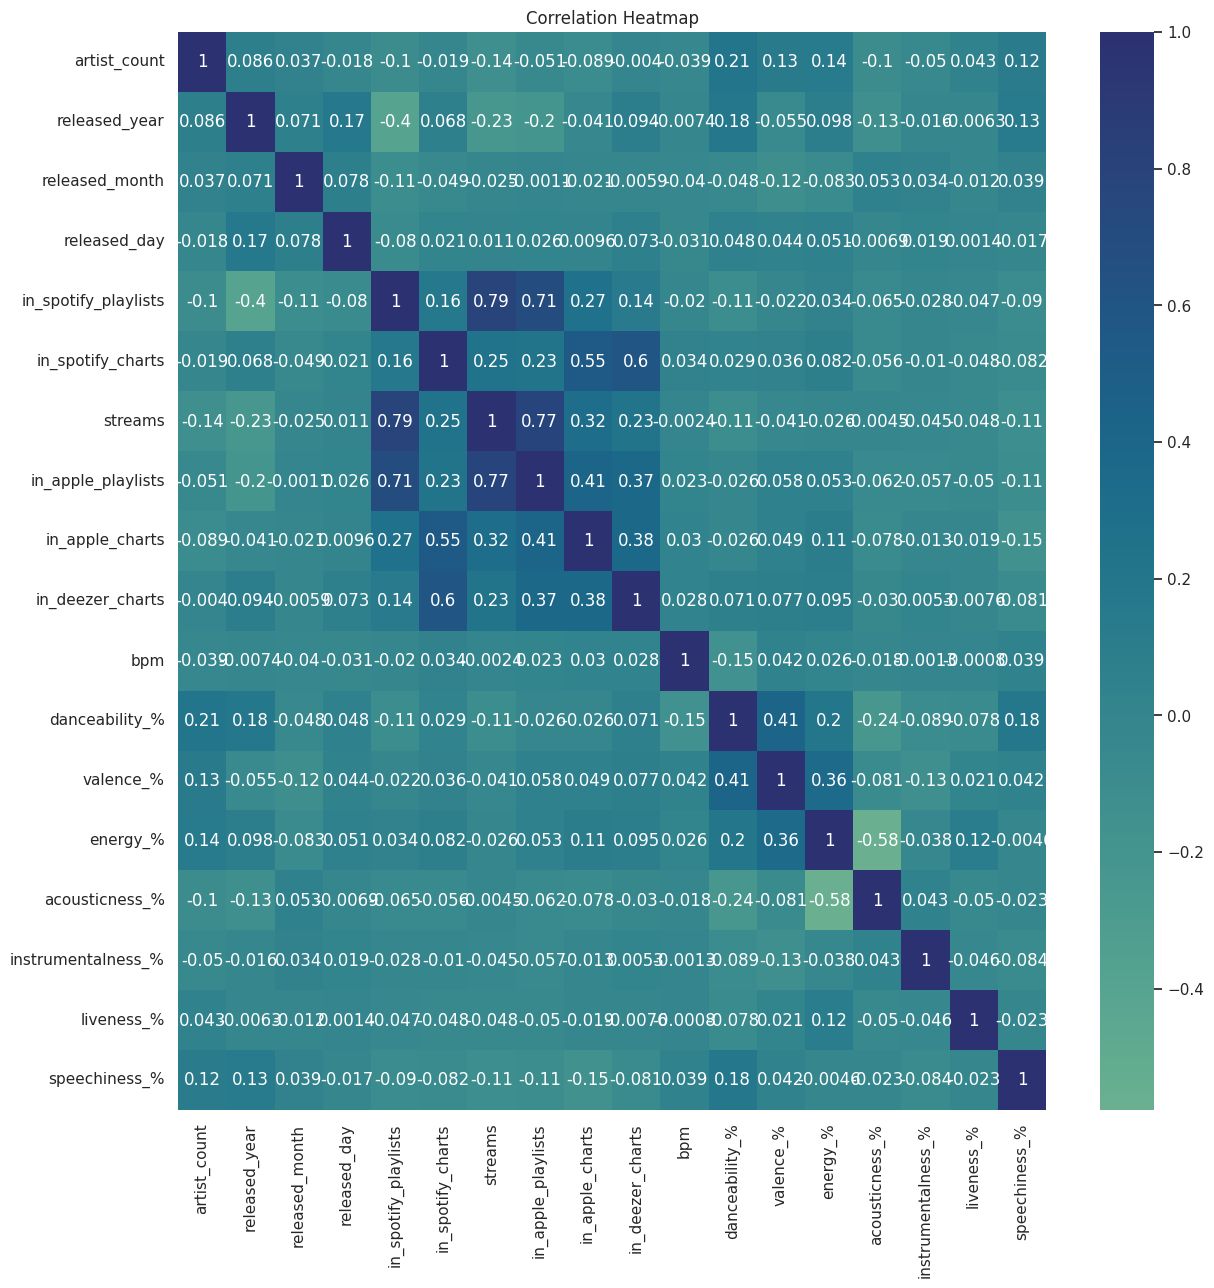

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and you've addressed the missing features issue

# 1. Ensure numeric data types:
#    - Convert relevant columns to numeric types if necessary.
#    - Replace non-numeric values with NaN if needed.
for col in ['danceability', 'energy', 'valence', 'acousticness', 'streams']:
    if col in data.columns:  # Check if column exists
        data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to numeric

# 2. Calculate the correlation matrix:
corre = data.corr(numeric_only=True)

# 3. Create the heatmap:
plt.figure(figsize=(14, 14))
sns.heatmap(corre, annot=True, cmap='crest', center=0)
plt.title('Correlation Heatmap')
plt.show()

Let's say you observe a dark red cell at the intersection of the "danceability" and "energy" features. This suggests a strong positive correlation between these two features. This means that as the danceability of a song increases, its energy level also tends to increase.

Conversely, if you see a dark blue cell at the intersection of "acousticness" and "energy," it would indicate a strong negative correlation. This implies that as the acousticness of a song increases, its energy level tends to decrease.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# ... (Your existing code to load and prepare data, create popularity levels, etc.) ...

# 1. Train a Decision Tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# 2. Get feature importances
feature_importances = tree_model.feature_importances_

# 3. Select top features
top_features = X_train.columns[feature_importances.argsort()[::-1][:5]]  # Select top 5 features

# 4. Create a subset of data with top features
X_top_features = data[top_features]

# 5. Calculate correlation matrix for top features
corre_top = X_top_features.corr()

# 6. Create heatmap for top features
plt.figure(figsize=(10, 8))
sns.heatmap(corre_top, annot=True, cmap='crest', center=0)
plt.title('Correlation Heatmap for Top Features')
plt.show()

## Linear Regression Model to Predict Streams

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [59]:
my_features = ['artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_charts', 'in_spotify_playlists', 'in_apple_playlists']
target = ['streams']

X = data[my_features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)


y_predicted = lr.predict(X_test)



print('Model Accuracy: ', round(r2_score(y_test, y_predicted), 3) * 100, '%')

Model Accuracy:  68.0 %


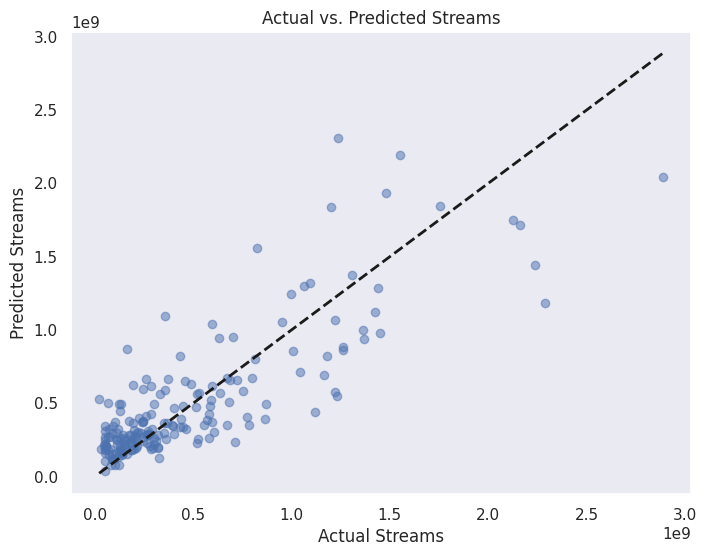

In [56]:
import matplotlib.pyplot as plt

# ... (your existing code) ...

# Plot the predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predicted, alpha=0.5)  # Alpha for transparency
plt.xlabel("Actual Streams")
plt.ylabel("Predicted Streams")
plt.title("Actual vs. Predicted Streams")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.show()

Model Accuracy (R2 Score): An R2 score of 68.0% means that your Linear Regression model explains 68% of the variance in the target variable (streams). This is a much better score than before, indicating that the features you selected have a reasonably good relationship with the number of streams.

Possible reasons for the accuracy:

Relevant Features: The features you selected (artist_count, released_year, etc.) likely have a moderate to strong correlation with the number of streams.
Linearity: A linear relationship between the features and the target variable might be a reasonable assumption for this data.
Sufficient Data: You likely have enough data for the model to learn patterns and make decent predictions.

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# ... (Your existing code to load and prepare data) ...

# 1. Create a binary target variable for popularity
# Assuming 'streams' is the column representing stream counts
median_streams = data['streams'].median()
data['is_popular'] = (data['streams'] > median_streams).astype(int)  # 1 for popular, 0 for not popular

# 2. Define features and target
my_features = ['artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_charts', 'in_spotify_playlists', 'in_apple_playlists']
target = ['is_popular']  # Now using the binary target

X = data[my_features]
y = data[target]

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# 4. Create and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train.values.ravel())  # ravel() to avoid warning

# 5. Make predictions on the test set
y_pred = logreg.predict(X_test)

# 6. Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 83.25%


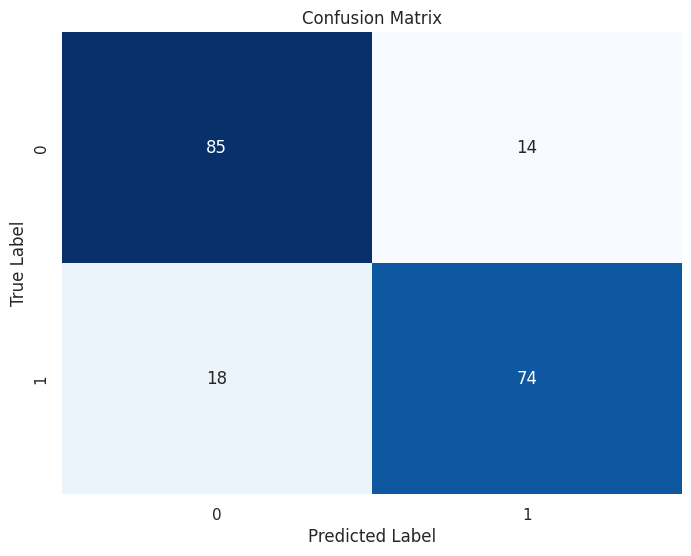

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ... (your existing code for Logistic Regression) ...

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# ... (Your existing code to load and prepare data) ...

# 1. Create a binary target variable for popularity (if not already done)
# ... (Same as before) ...

# 2. Define features and target
my_features = ['artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_charts', 'in_spotify_playlists', 'in_apple_playlists']
target = ['is_popular']

X = data[my_features]
y = data[target]

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# 4. Create and train the Decision Tree model
tree_model = DecisionTreeClassifier()  # Create a DecisionTreeClassifier object
tree_model.fit(X_train, y_train)  # Train the model

# 5. Make predictions on the test set
y_pred = tree_model.predict(X_test)

# 6. Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# (Optional) Visualize the Decision Tree
# from sklearn.tree import plot_tree
# plt.figure(figsize=(12, 8))
# plot_tree(tree_model, feature_names=my_features, class_names=['Not Popular', 'Popular'], filled=True)
# plt.show()

Model Accuracy: 81.15%


The confusion matrix provides a visual representation of the model's performance by showing the counts of:

True Positives (TP): Correctly predicted popular songs.
True Negatives (TN): Correctly predicted not popular songs.
False Positives (FP): Incorrectly predicted popular songs (Type I error).
False Negatives (FN): Incorrectly predicted not popular songs (Type II error).
By analyzing the values in the confusion matrix, you can gain insights into the model's strengths and weaknesses in classifying songs into different categories. For example, a high number of true positives and true negatives indicates good overall accuracy, while a high number of false positives or false negatives suggests areas where the model might need improvement.

I hope this helps you visualize the performance of your Decision Tree model!

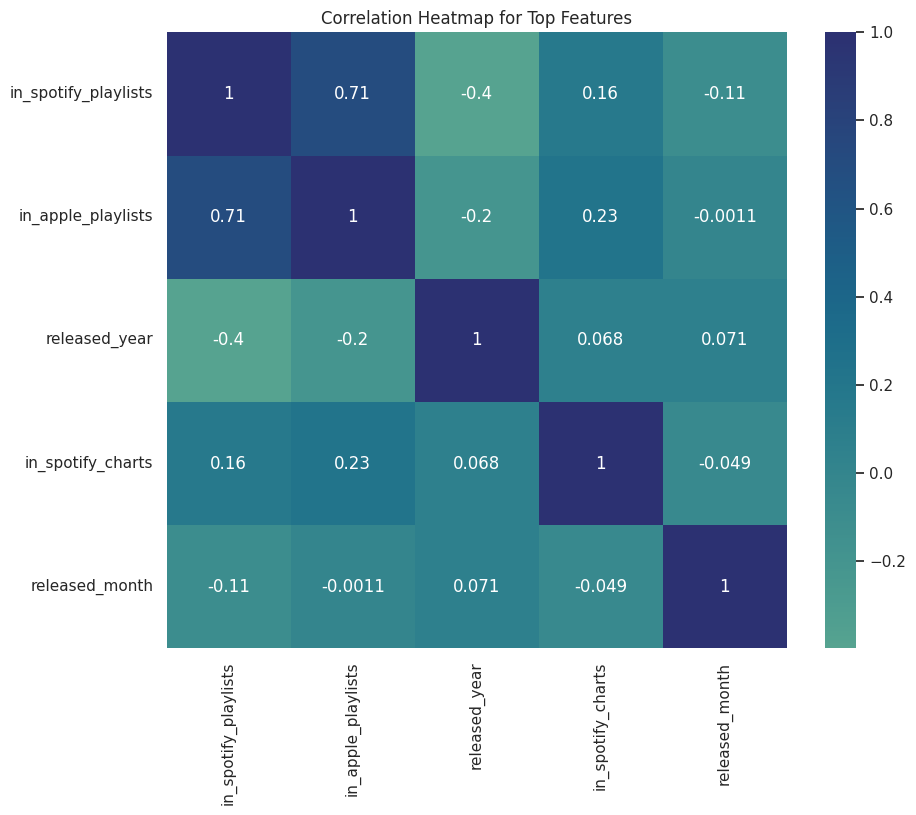

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# ... (Your existing code to load and prepare data, create popularity levels, etc.) ...

# 1. Train a Decision Tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# 2. Get feature importances
feature_importances = tree_model.feature_importances_

# 3. Select top features
top_features = X_train.columns[feature_importances.argsort()[::-1][:5]]  # Select top 5 features

# 4. Create a subset of data with top features
X_top_features = data[top_features]

# 5. Calculate correlation matrix for top features
corre_top = X_top_features.corr()

# 6. Create heatmap for top features
plt.figure(figsize=(10, 8))
sns.heatmap(corre_top, annot=True, cmap='crest', center=0)
plt.title('Correlation Heatmap for Top Features')
plt.show()

When describing correlation with respect to the output and the features:

Correlation with Output (Streams/Popularity Levels):

The features (bpm, energy_%, danceability_%, etc.) are used to predict the popularity level or streams of a song.
Correlation between Features and Target:
A positive correlation means that as a feature value increases, the output (e.g., popularity or streams) is likely to also increase.
For example, if energy_% has a positive correlation with popularity, it suggests that more energetic songs tend to be more popular.
A negative correlation means that as a feature increases, the output decreases. For instance, if bpm has a negative correlation with popularity, it could imply that faster songs might be less popular.
Correlation Between Features:

High Correlation Between Features:
If two features are highly correlated with each other (e.g., energy_% and danceability_%), it indicates that they might be contributing similar information about the song.
When features are highly correlated, keeping both may not add value since they explain the same part of the variance in the output (streams or popularity). This can lead to redundancy and might affect model efficiency.
Impact on Model:

Highly Correlated Features may lead to multicollinearity, which can make it harder for the model to learn distinct relationships between each feature and the output.
By understanding the correlation between features and the target, you can determine which features are most useful for predicting popularity or streams effectively.
Example:
If the heatmap shows a strong positive correlation between danceability_% and popularity level, it suggests that more danceable songs are generally more popular.
If bpm is negatively correlated with popularity, it indicates that slower songs might be preferred by the audience, leading to higher popularity.

artist_count vs. streams:

Correlation Coefficient: The value indicates how the number of artists on a song relates to the number of streams.
Interpretation: If the correlation is positive and strong, it suggests that songs with more artists tend to get more streams (perhaps due to increased reach and cross-promotion). If the correlation is weak or close to zero, it indicates little to no linear relationship between the number of artists and the streams.


released_year vs. streams:

Correlation Coefficient: This value tells us whether the year a song is released affects its streaming numbers.
Interpretation: A positive correlation might indicate that more recent songs have higher streaming numbers, which could be due to increased platform availability and user engagement over time. A negative correlation would mean older songs get more streams, possibly due to nostalgia or their inclusion in playlists.

released_month vs. streams:

Correlation Coefficient: This measures if the month a song was released affects its popularity.
Interpretation: If there is a notable positive or negative correlation, it could indicate that certain months (e.g., holiday seasons) are better for song releases and drive higher streams.

released_day vs. streams:

Correlation Coefficient: This value indicates whether the specific day of the month impacts the number of streams.
Interpretation: Typically, we expect a low correlation here, as the day of release may not have a major effect on long-term streaming success. A strong correlation might indicate a specific trend in release timing (e.g., beginning or end of the month).

in_spotify_charts vs. streams:

Correlation Coefficient: Indicates if being in Spotify charts correlates with the number of streams.
Interpretation: A high positive correlation suggests that being featured in Spotify charts significantly increases streams. This is expected because chart placement often increases visibility and boosts listening.

in_spotify_playlists vs. streams:

Correlation Coefficient: Measures how inclusion in Spotify playlists affects streaming numbers.
Interpretation: A strong positive correlation means that being added to Spotify playlists is a significant driver of streams. Playlists can expose songs to more listeners, greatly boosting their popularity.

in_apple_playlists vs. streams:

Correlation Coefficient: Indicates if inclusion in Apple playlists has an effect on streaming numbers.

Interpretation: Similar to Spotify playlists, a positive correlation here means that being added to Apple playlists helps increase streams. A weaker correlation compared to Spotify might suggest that Spotify playlists have a bigger impact on stream counts for this dataset.

Key Insights:
High Correlations with Streams: Features like in_spotify_playlists and in_spotify_charts are likely to have high positive correlations with streams, which means that songs included in playlists or charts tend to get significantly more streams.


Moderate to Low Correlations: Features like released_day or artist_count may show moderate or low correlations with streams, suggesting these factors have less direct impact compared to features related to exposure and promotion (like playlist and chart inclusions).

Redundancy Between Features: If there are features that are highly correlated with each other (e.g., in_spotify_playlists and in_spotify_charts), it indicates they may provide similar information. In such cases, one of the features could be dropped to avoid redundancy in the model.
